In [1]:
#This is The Introduction for Classification

In [2]:
from sklearn.datasets import make_circles
#make sample
n_sample=1000

#Create Circle
X,y=make_circles(n_sample,noise=0.03,random_state=42)


In [3]:
#Check Features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#Check Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
#understand Data
import pandas as pd
circles= pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"LABEL":y})
circles

,X0,X1,LABEL
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


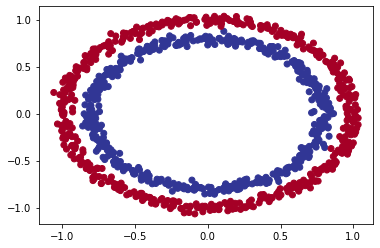

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

# Steps For Modeling

1. Create a Model
2. Compile Model
3. Fit Model
4. Evaluate the Modeş
5. Tweak
6. Evaluate

In [7]:
import tensorflow as tf

In [8]:
#Set Random Seed
tf.random.set_seed(42)

#1.Create the model using the Sequantial API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile
model_1.compile(loss=tf.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3. Fit the Model
model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 812us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 657us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 688us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 688us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 688us/step - loss: 0.6942 - accuracy: 0.4820


In [9]:
#increase accuracy
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 625us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

model yeterli gelmedi binaryde layer arttırmamız lazım

In [10]:
#Model 2
#Set random seed
tf.random.set_seed(42)

#1. Create the Model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2.Compile
model_2.compile(loss=tf.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3. Fit the Model
model_2.fit(X,y,epochs=100,verbose=0)


In [11]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 625us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

# IMPROVING Model

1. Create a Model- increase the number of hidden units , add more layers, activation functions
2. Compile Model- Changing optimization unit as an example SGD to Adam()
3. Fit Model- Increasing Epochs Number, change learning rate,fitting on more data ,fitting for longer
4. Evaluate the Model
5. Tweak
6. Evaluate



In [12]:
circles["LABEL"].value_counts()

1    500
0    500
Name: LABEL, dtype: int64

In [13]:
#Model 3
#Set random seed
tf.random.set_seed(42)

#1. Create the Model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile
model_3.compile(loss=tf.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#Fitting
model_3.fit(X,y,epochs=100,verbose=0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 656us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [14]:
import numpy as np

In [12]:
#defining function to easy prediction
#https://cs231n.github.io/neural-networks-case-study/
#-----------------------------------------------------
def plot_decision_boundary(model,X,y):
    x_min,x_max=X[:,0].min()-0.1, X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1, X[:,1].max()+0.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100) )
    x_in=np.c_[xx.ravel(),yy.ravel()]
    
    y_pred=model.predict(x_in)
    
    #Check for multi-class
    if len(y_pred[0])>1:
        print("Multi-class")
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Binary")
        y_pred=np.round(y_pred).reshape(xx.shape)
        
    #Plotting
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:, 0], X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

Binary


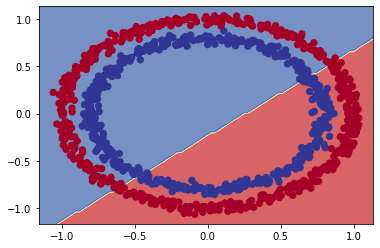

In [16]:
plot_decision_boundary(model_3,X,y)

In [17]:
#using the function for Regression
x_r=tf.range(0,1000,5)
y_r=tf.range(100,1100,5)

#Train and Test Data 
x_r_train=x_r[:150]
x_r_test=x_r[150:]

y_r_train=y_r[:150]
y_r_test=y_r[150:]

In [18]:
#Model 4 for Regression
#Set random seed
tf.random.set_seed(42)

#1. Create the Model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.compile
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])
#fitting the data
model_4.fit(x_r_train,y_r_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 803us/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 800us/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 801us/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 801us/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 800us/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [===========================

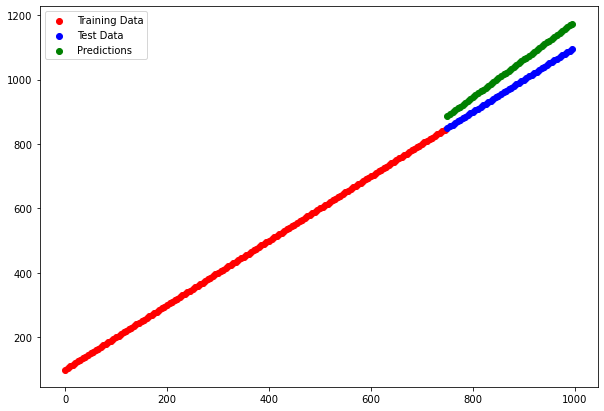

In [19]:
#predictions
y_r_predict=model_4.predict(x_r_test)

#plot
plt.figure(figsize=(10,7))
plt.scatter(x_r_train,y_r_train, c="r",label="Training Data")
plt.scatter(x_r_test,y_r_test, c="b",label="Test Data")
plt.scatter(x_r_test,y_r_predict, c="g",label="Predictions")
plt.legend();


#  Non linearity

In [20]:
#Set the seed
tf.random.set_seed(42)
#1. Create model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
#2. Compile the model
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]),
#3. fit the model
history=model_4.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 719us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/250
32/32 [==============================] - 0s 657us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/250
32/32 [==============================] - 0s 719us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/250
32/32 [==============================] - 0s 719us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/250
32/32 [==============================] - 0s 688us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/250
32/32 [==============================] - 0s 751us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/250
32/32 [==============================] - 0s 657us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/250
32/32 [==============================] - 0s 719us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/250
32/32 [==============================] - 0s 688us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/250
32/32 [==============================] - 0s 719us/step - loss: 3.7419 - accura

32/32 [==============================] - 0s 657us/step - loss: 0.6934 - accuracy: 0.4950
Epoch 161/250
32/32 [==============================] - 0s 688us/step - loss: 0.6933 - accuracy: 0.4980
Epoch 162/250
32/32 [==============================] - 0s 720us/step - loss: 0.6934 - accuracy: 0.4990
Epoch 163/250
32/32 [==============================] - 0s 688us/step - loss: 0.6933 - accuracy: 0.4900
Epoch 164/250
32/32 [==============================] - 0s 720us/step - loss: 0.6933 - accuracy: 0.4910
Epoch 165/250
32/32 [==============================] - 0s 719us/step - loss: 0.6933 - accuracy: 0.4870
Epoch 166/250
32/32 [==============================] - 0s 720us/step - loss: 0.6933 - accuracy: 0.4860
Epoch 167/250
32/32 [==============================] - 0s 720us/step - loss: 0.6933 - accuracy: 0.4920
Epoch 168/250
32/32 [==============================] - 0s 720us/step - loss: 0.6933 - accuracy: 0.4950
Epoch 169/250
32/32 [==============================] - 0s 751us/step - loss: 0.6933 - a

Binary


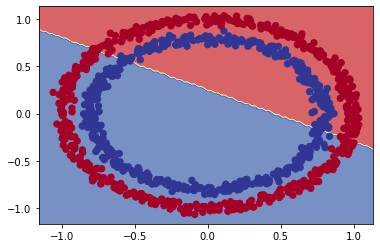

In [21]:
plot_decision_boundary(model_4,X,y)

In [22]:
#Set the seed
tf.random.set_seed(42)
#1. Create model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1)
])
#2. Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]),
#3. fit the model
history=model_5.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 813us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 781us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 751us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 719us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 750us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 813us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 750us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 813us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 813us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 813us/step - loss: 7.7125 - accura

32/32 [==============================] - 0s 751us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 161/250
32/32 [==============================] - 0s 751us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 162/250
32/32 [==============================] - 0s 782us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 163/250
32/32 [==============================] - 0s 750us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 164/250
32/32 [==============================] - 0s 782us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/250
32/32 [==============================] - 0s 751us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/250
32/32 [==============================] - 0s 751us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/250
32/32 [==============================] - 0s 782us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/250
32/32 [==============================] - 0s 782us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/250
32/32 [==============================] - 0s 782us/step - loss: 7.7125 - a

Binary


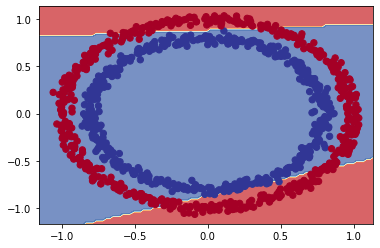

In [23]:
plot_decision_boundary(model_5,X,y)

In [24]:
#Set the seed
tf.random.set_seed(42)
#1. Create model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation="sigmoid")
])
#2. Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]),
#3. fit the model
history=model_5.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 813us/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 687us/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 751us/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 782us/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 751us/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 750us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 751us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 719us/step - loss: 0.6766 - accuracy: 

32/32 [==============================] - 0s 719us/step - loss: 0.1090 - accuracy: 0.9900
Epoch 161/250
32/32 [==============================] - 0s 719us/step - loss: 0.1079 - accuracy: 0.9930
Epoch 162/250
32/32 [==============================] - 0s 720us/step - loss: 0.1058 - accuracy: 0.9930
Epoch 163/250
32/32 [==============================] - 0s 719us/step - loss: 0.1046 - accuracy: 0.9940
Epoch 164/250
32/32 [==============================] - 0s 750us/step - loss: 0.1031 - accuracy: 0.9930
Epoch 165/250
32/32 [==============================] - 0s 720us/step - loss: 0.1027 - accuracy: 0.9890
Epoch 166/250
32/32 [==============================] - 0s 720us/step - loss: 0.1010 - accuracy: 0.9930
Epoch 167/250
32/32 [==============================] - 0s 750us/step - loss: 0.0996 - accuracy: 0.9930
Epoch 168/250
32/32 [==============================] - 0s 751us/step - loss: 0.0986 - accuracy: 0.9920
Epoch 169/250
32/32 [==============================] - 0s 751us/step - loss: 0.0970 - a

Binary


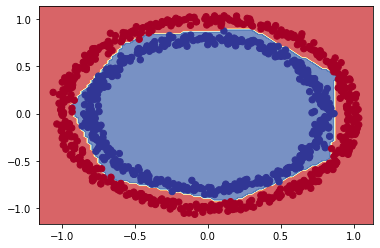

In [25]:
plot_decision_boundary(model_5,X,y)

# Improvement and Realty

In [26]:
#splitting test and train data set
x_train,y_train= X[:800], y[:800]
x_test,y_test= X[800:], y[800:]
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [50]:
#new Model for training/ Test Data

#set seed
tf.random.set_seed(42)

#1. Create a model

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
     tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
tf.keras.layers.Dense(1,activation="sigmoid")
])
#2. Compile the model
model_8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]),
#3. fit the model
history=model_8.fit(x_train,y_train,epochs=25)




Epoch 1/25
25/25 [==============================] - 0s 721us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 721us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 761us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 720us/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 641us/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 680us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 680us/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 761us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 681us/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 681us/step - loss: 0.5714 - accuracy: 0.7738

In [51]:
#4. Evaluation of model
model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 715us/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885359287262, 1.0]

Binary
Binary


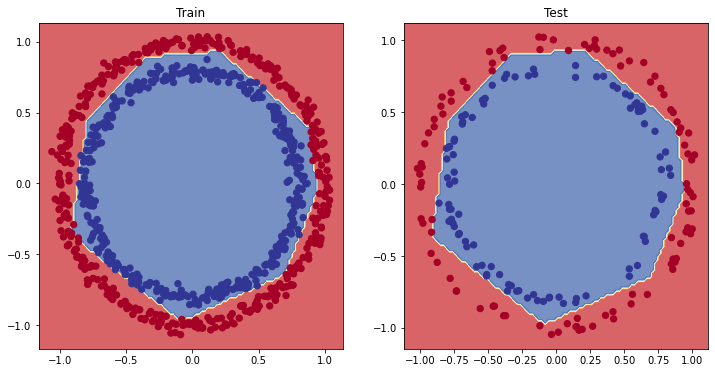

In [52]:
#Plotting
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,x_test,y_test)

# History visualizition

In [38]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.687469,0.54125
1,0.676977,0.60000
2,0.663354,0.62125
3,0.643059,0.69250
4,0.608931,0.76500
5,0.558802,0.85125
6,0.480453,0.92125
7,0.394849,0.95750
8,0.307909,0.98000
9,0.228342,0.99875


Text(0.5, 1.0, 'Model_8 loss/accuracy Curves')

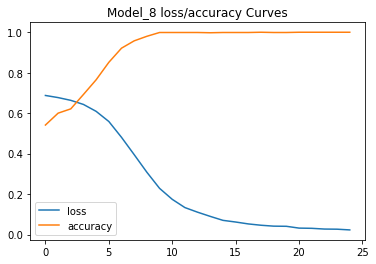

In [39]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss/accuracy Curves")


# Finding the best learning Rate

In [40]:
#Set the seed
tf.random.set_seed(42)

# 1. Create a MODEL
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2.compile the model 
model_9.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

#Learning Rate Callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# fit the model
history_9= model_9.fit(x_train,y_train,epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 787us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 720us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 720us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 681us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 765us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 720us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 682us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 721us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 761us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 721us/step - loss: 0.6871 - accura

Text(0.5, 1.0, 'The Curve of Model_9')

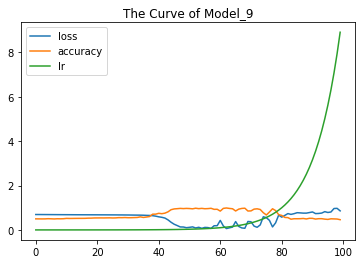

In [41]:
pd.DataFrame(history_9.history).plot()
plt.title("The Curve of Model_9")

Text(0.5, 1.0, 'LR vs Accuracy')

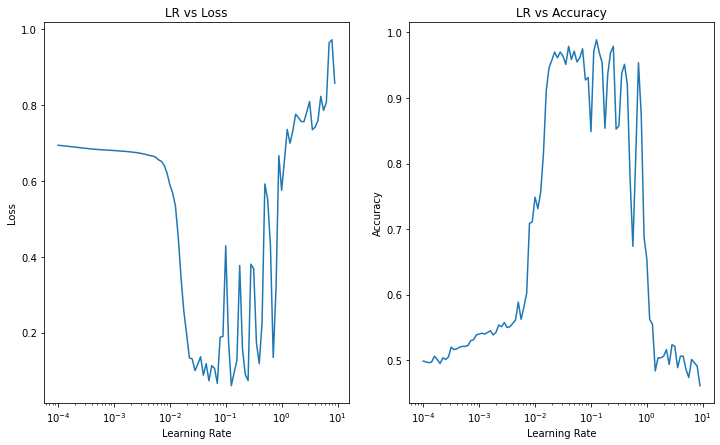

In [42]:
#Plot learning Rate vs LOSS
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("LR vs Loss")
plt.subplot(1,2,2)
plt.semilogx(lrs,history_9.history["accuracy"])
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("LR vs Accuracy")

In [47]:
#Higher ideal learning rate
#set seed
tf.random.set_seed(42)

#1. Ccreate Model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2. Compile for ideal Learning Rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.01995),
                metrics=["accuracy"])
#3. Fit the model
his_10=model_10.fit(x_train,y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 720us/step - loss: 0.6837 - accuracy: 0.5612
Epoch 2/20
25/25 [==============================] - 0s 680us/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 721us/step - loss: 0.6628 - accuracy: 0.5900
Epoch 4/20
25/25 [==============================] - 0s 720us/step - loss: 0.6339 - accuracy: 0.6425
Epoch 5/20
25/25 [==============================] - 0s 680us/step - loss: 0.5842 - accuracy: 0.7487
Epoch 6/20
25/25 [==============================] - 0s 680us/step - loss: 0.4927 - accuracy: 0.8338
Epoch 7/20
25/25 [==============================] - 0s 760us/step - loss: 0.4268 - accuracy: 0.8475
Epoch 8/20
25/25 [==============================] - 0s 720us/step - loss: 0.3625 - accuracy: 0.8850
Epoch 9/20
25/25 [==============================] - 0s 681us/step - loss: 0.3166 - accuracy: 0.9087
Epoch 10/20
25/25 [==============================] - 0s 720us/step - loss: 0.2533 - accuracy: 0.9475

In [55]:
#Evaluate
model_10.evaluate(x_test,y_test),model_8.evaluate(x_test,y_test)

7/7 [==============================] - 0s 715us/step - loss: 0.1247 - accuracy: 1.0000


([0.058612924069166183, 0.9900000095367432], [0.1246885359287262, 1.0])

Binary
Binary


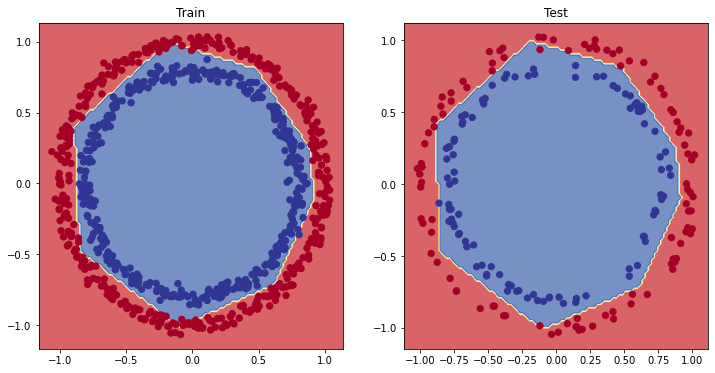

In [56]:
#plotting data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,x_test,y_test)

# Confusion Matrix

In [61]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix

#Predicttion
y_pred=model_10.predict(x_test)

y_pred=tf.round(y_pred)


#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[99,  2],
       [ 0, 99]], dtype=int64)

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Confusion matrixi güzellestirme

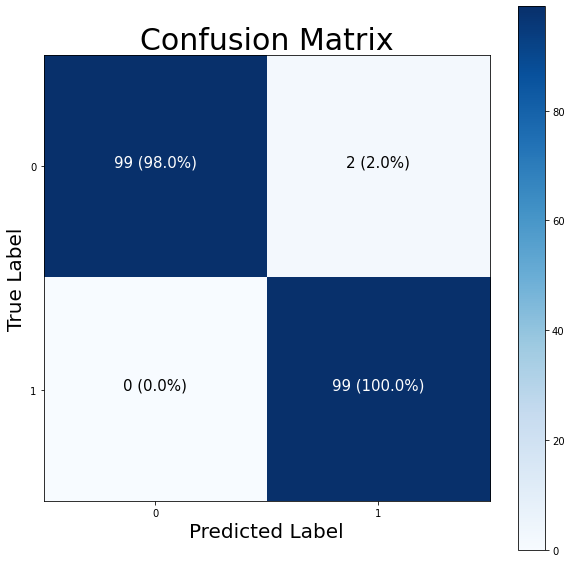

In [69]:
import itertools

figsize=(10,10)

cm=confusion_matrix(y_test,y_pred)
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]

#Making prettify
fig, ax= plt.subplots(figsize=figsize)
# Create matrix Plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create clases

classes = False

if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])

#axis labeling
ax.set(title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)
#Set x axis to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust  label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(30)
#set thresh hold for different Colours
threshold= (cm.max()+cm.min())/2

#Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment= "center",
            color="white"  if cm[i,j]>threshold else "black",
            size=15)


# Uygulama

In [42]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [7]:
tf.random.set_seed(42)
x, y = make_moons(500, noise=0.1)

# Split into test and training data
train_data, test_data, train_label,test_label = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [9]:
x.shape,train_data.shape,test_data.shape

((500, 2), (400, 2), (100, 2))

In [10]:
#understand Data
import pandas as pd
circles= pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"LABEL":y})
circles


,X0,X1,LABEL
0,1.609510,-0.301448,1
1,1.840701,-0.282786,1
2,0.285163,0.968768,0
3,1.142456,0.064165,0
4,-0.253074,0.974869,0
...,...,...,...
495,0.086508,1.014013,0
496,-0.755586,0.692237,0
497,0.527807,0.844400,0
498,-0.951237,0.133826,0


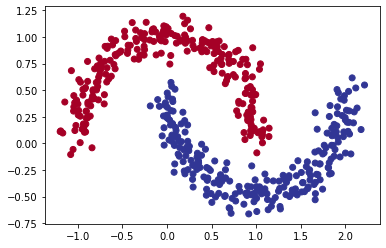

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, cmap=plt.cm.RdYlBu)

In [48]:
#Higher ideal learning rate
#set seed
tf.random.set_seed(42)

#1. Ccreate Model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
       tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(8, activation="tanh"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#2. Compile for ideal Learning Rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.0016),
                metrics=["accuracy"])
#Learning Rate Callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
#3. Fit the model
his_0=model_10.fit(train_data,train_label, epochs=100,
                  validation_data=(test_data,test_label))

Epoch 1/100
13/13 [==============================] - 0s 22ms/step - loss: 0.6952 - accuracy: 0.3825 - val_loss: 0.6833 - val_accuracy: 0.4900
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5200 - val_loss: 0.6679 - val_accuracy: 0.6700
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.7350 - val_loss: 0.6458 - val_accuracy: 0.7600
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.7850 - val_loss: 0.6121 - val_accuracy: 0.8000
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.8125 - val_loss: 0.5729 - val_accuracy: 0.8300
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8350 - val_loss: 0.5310 - val_accuracy: 0.8400
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.8575 - val_loss: 0.4909 - val_accuracy: 0.8700
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 60/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 61/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 62/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 63/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 64/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 65/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 

Text(0.5, 1.0, 'LR vs Accuracy')

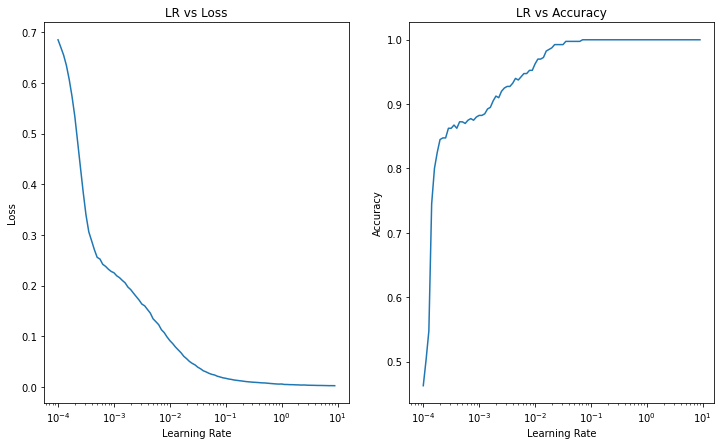

In [45]:
#Plot learning Rate vs LOSS
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.semilogx(lrs,his_0.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("LR vs Loss")
plt.subplot(1,2,2)
plt.semilogx(lrs,his_0.history["accuracy"])
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("LR vs Accuracy")

Binary
Binary


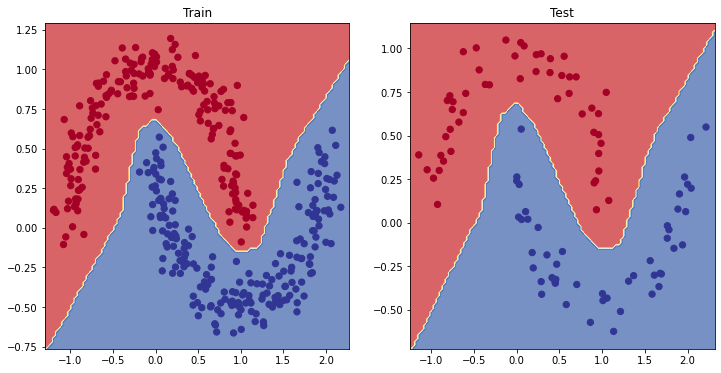

In [47]:
#plotting data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,train_data,train_label)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,test_data,test_label)